"1.1. Load [VKontakte](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1) dataset to NetworkX <br>\n",
    "1.2. Choose 3-5 nodes from the existing network and create the subgraph with network framing (only `seed` and `friends#1` nodes, only `r0`, `r1`, `r2` edges) <br>\n",
    "1.3. Find graph diameter, average and global clustering coefficient <br>\n",
    "1.4. Find max and mean values of incoming and outcoming node degrees <br>\n",
    "1.5. Vizualize your graph in gephi or networkX or grahistry <br>\n"
   ]

## 1.1. Load [VKontakte](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1) dataset to NetworkX

In [1]:
import pandas as pd
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


import warnings; warnings.simplefilter('ignore')
G = nx.read_adjlist('facebook_combined.txt')


In [4]:
facebook = pd.read_csv(".//facebook_combined.txt", sep="\t")

In [9]:
facebook

,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6
5,0 7
6,0 8
7,0 9
8,0 10
9,0 11


In [5]:
G_small = nx.read_adjlist('facebook_combined.txt')
print("Number of nodes -", len(G_small.nodes()))
print("Number of edges -", len(G_small.edges()))

Number of nodes - 4039
Number of edges - 88234


In [6]:
k = dict (G_small.degree ())
k2 = {key: value for key, value in k.items() if value > 15 and value < 250}

G2 = G_small.subgraph(list(k2.keys()))
print("Number of nodes -", len(G2.nodes()))
print("Number of edges -", len(G2.edges()))

k3 = ['VK_9292673', 'VK_25232674', 'VK_27094302']

Number of nodes - 2636
Number of edges - 75868


In [7]:
G2 = G_small.subgraph(k3)
G2.nodes()

NodeView(())

In [8]:
df = pd.read_csv('facebook_combined.txt', sep = '\t')
all_ids = list(df["ID"].unique())
df = df[df["Friends"].isin(all_ids)]

KeyError: 'ID'

In [8]:
df_2 = df.loc[df['ID'].isin(k3)]
df_2.sample(10)

,Unnamed: 0,Friends,ID,Name
93154,1536687,VK_56841498,VK_25232674,Ян Дзюбинский
94008,1545057,VK_73035028,VK_27094302,Анастасия Матвеенко
94046,1545169,VK_113105730,VK_27094302,Анастасия Матвеенко
93143,1536639,VK_47189394,VK_25232674,Ян Дзюбинский
94014,1545082,VK_80411754,VK_27094302,Анастасия Матвеенко
93078,1536332,VK_8154145,VK_25232674,Ян Дзюбинский
93901,1544742,VK_10463524,VK_27094302,Анастасия Матвеенко
94115,1545418,VK_409433988,VK_27094302,Анастасия Матвеенко
93166,1536740,VK_68797455,VK_25232674,Ян Дзюбинский
93058,1536274,VK_2583221,VK_25232674,Ян Дзюбинский


In [9]:
subgraph_ids = list(df["Friends"].unique())
len(subgraph_ids)

3920

In [10]:
ids = list()
with open("vk", "r") as file:
    for line in file:
        ids.append(line.split('\t')[1])
print(len(ids))

125626


In [11]:
df_2795 =  pd.DataFrame(vk)
friends = list(df_2795["Friends"].unique())
ids = list(df_2795["ID"].unique())
print(len(friends))

5127


In [12]:
seed_friends = set(df_2["ID"])
print(len(seed_friends))
for myid in df_2["Friends"]:
    seed_friends.add(myid)
print(len(seed_friends))

3
269


In [12]:
with open('facebook_combined.txt') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [ [ int(x.strip().split()[0]), int(x.strip().split()[1])]for x in content]

In [13]:
graph = nx.Graph()

for node in content:
    graph.add_edge(node[0],  node[1])

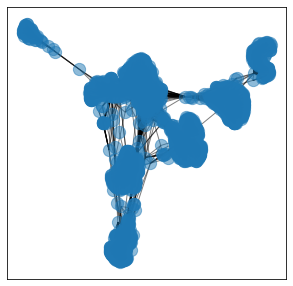

In [14]:
plt.figure(figsize=(5,5))
nx.draw_networkx(graph,
    with_labels=False,
    node_size=150,
    alpha=0.5);

In [17]:
largest_component = max(nx.connected_components(G_small), key=len)
G2 = G_small.subgraph(largest_component)
print("Diameter of connected component -", nx.diameter(G2))
print("Average clustering coefficient - {:.2f}".format(nx.average_clustering(G2)), "\n")

Diameter of connected component - 8
Average clustering coefficient - 0.61 



Average clustering coefficient :  0.60555


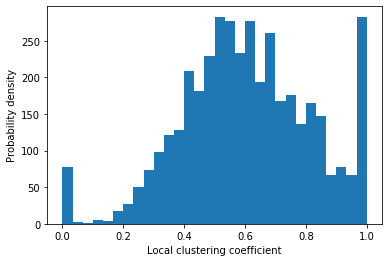

In [15]:
clustering_coeffs = [nx.clustering(graph,i) for i in range(len(graph))]
plt.hist(clustering_coeffs, bins=30);
plt.xlabel("Local clustering coefficient");
plt.ylabel("Probability density");
print("Average clustering coefficient : %8.5f" %np.average(clustering_coeffs))

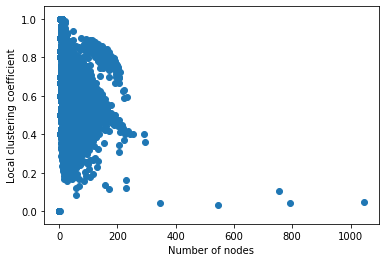

In [16]:
degree_clustering_coeffs = np.array([ [nx.clustering(graph,i),nx.degree(graph,i)]  for i in range(len(graph))])
plt.scatter(degree_clustering_coeffs[:,1], degree_clustering_coeffs[:,0]);
plt.xlabel("Number of nodes");
plt.ylabel("Local clustering coefficient");

# Global clustering coefficient

In [18]:
print(nx.transitivity(G))

0.5191742775433075


(-0.95, 1.05, -1.0, 0.75)

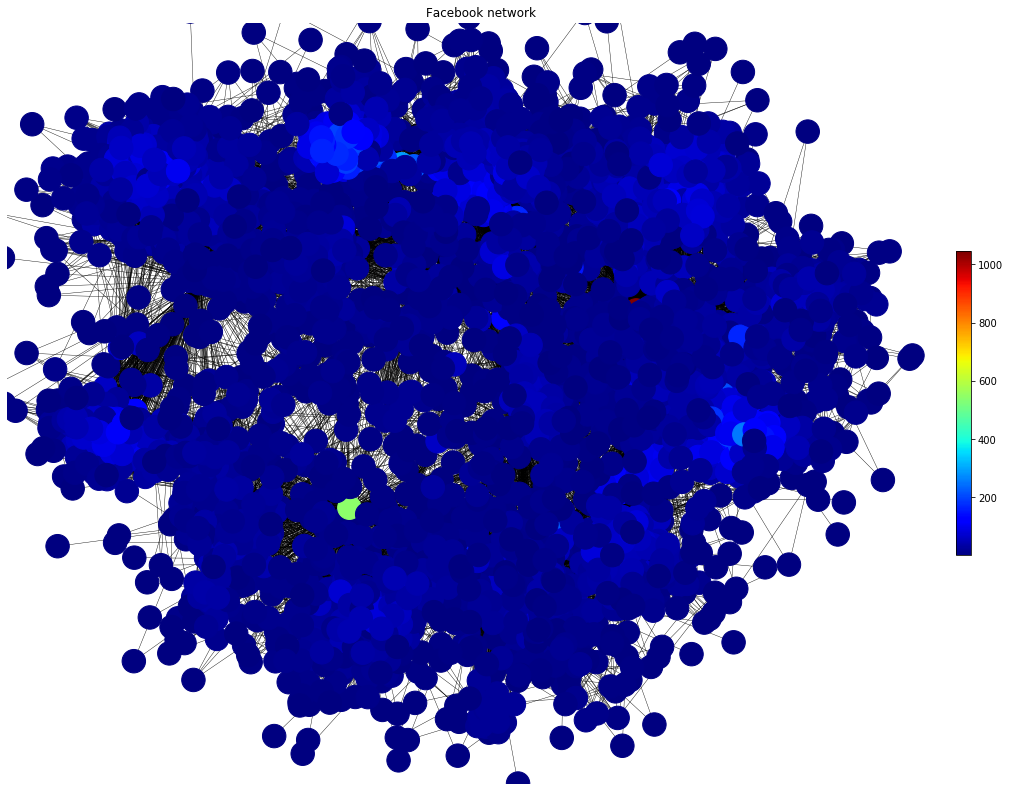

In [26]:
plt.figure(figsize=(20,14))
# k = nx.degree(G_small)
k = dict (G_small.degree ())
# print(k)
# set nodes' colors according to their degrees:
node_colors = list(k.values())

nodes = nx.draw_networkx_nodes(G_small, pos = coord, 
                               node_color=node_colors, 
                               node_size = 550, 
                               nodelist=list(k.keys()),                
                               with_labels = False,
                               cmap = 'jet')
edges = nx.draw_networkx_edges(G_small, pos = coord, width = .4)

# the borders can be then reduced to zoom in the graph:
plt.xlim([-.95, 1.05])
plt.ylim([-1., .75])
# add colorbar to see which nodes have the highest degrees:
plt.colorbar(nodes, shrink = .4, pad = .0005, aspect = 20)
plt.title('Facebook network')
plt.axis("off")



In [24]:
# function to create proper histogram in matplotlib:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    # use various colors for different bins:
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

Text(41, 47, 'Min degree - 1')

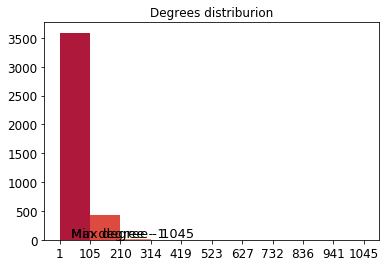

In [25]:
plt.title("Degrees distriburion", y = 1.00)
plot_hist(data = list(k.values()), colormap = 'RdYlBu', alpha = 0.9, bins = 10, round_value=1)
plt.text(x = 41, y = 52, s = "Max degree - " + str(max(k.values())), fontsize = 13)
plt.text(x = 41, y = 47, s = "Min degree - " + str(min(k.values())), fontsize = 13)

In [22]:
# take only giant connected component for the further analysis: 
largest_component = sorted(nx.connected_components(G_small), key = len, reverse=True)
print(len(largest_component))
Gc = G_small.subgraph(largest_component[0])
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

1
Number of nodes - 4039
Number of edges - 88234


In [21]:
k2 = {key: value for key, value in k.items() if value > 15 and value < 250}

G2 = G_small.subgraph(list(k2.keys()))
print("Number of nodes -", len(G2.nodes()))
print("Number of edges -", len(G2.edges()))

Number of nodes - 2636
Number of edges - 75868


(-0.95, 1.05, -1.0, 0.75)

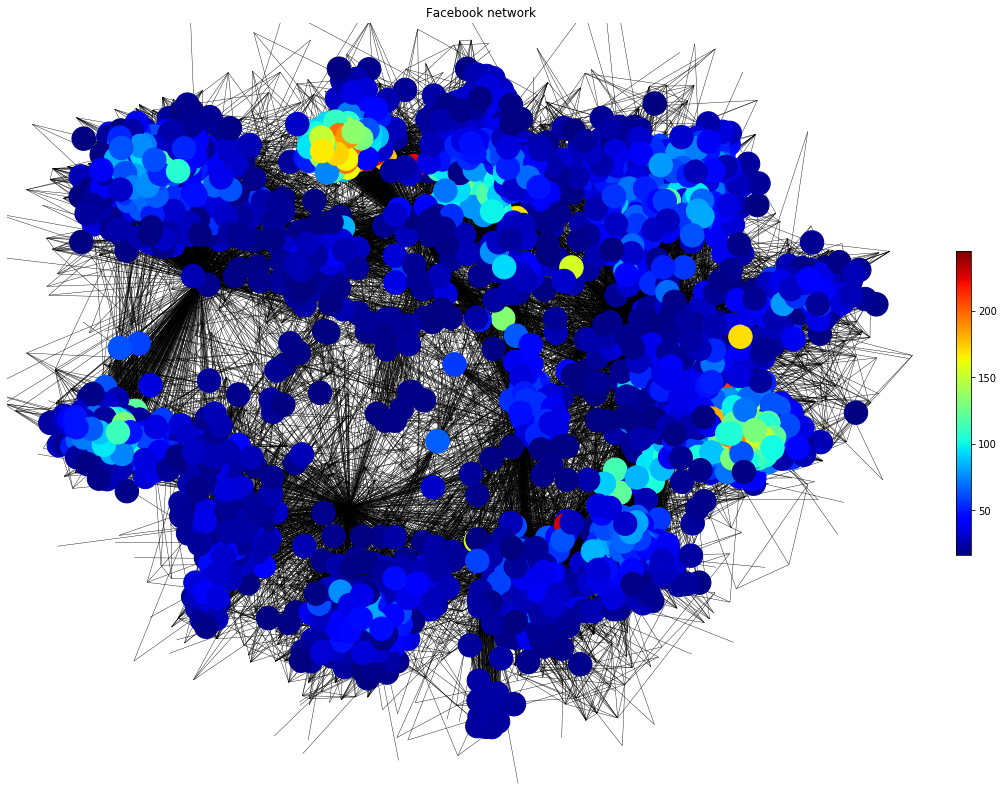

In [20]:
coord = nx.spring_layout(G2, k = 0.15)

plt.figure(figsize=(20,14))

node_colors = list(k2.values())

nodes = nx.draw_networkx_nodes(G2, pos = coord, 
                               node_color=node_colors, 
                               node_size = 550, 
                               nodelist=list(k2.keys()),                
                               with_labels = False,
                               cmap = 'jet')
edges = nx.draw_networkx_edges(G2, pos = coord, width = .4)

# the borders can be then reduced to zoom in the graph:
plt.xlim([-.95, 1.05])
plt.ylim([-1., .75])
# add colorbar to see which nodes have the highest degrees:
plt.colorbar(nodes, shrink = .4, pad = .0005, aspect = 20)
plt.title('Facebook network')
plt.axis("off")